### Using an unsupervised Learning approach to assess the different groups of loan applicants

### Read CSV File

In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df = pd.read_csv("data/SBAnational.csv")


C:\Users\PC\anaconda3\envs\pycaret\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [3]:
df.shape

(899164, 27)

### Data Preprocessing 

##### Remove dollar signs from all columns with the function below

In [4]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

##### Keep top 4000 rows

In [5]:
#keep top 4000 rows

df = df[:4000]
df['DisbursementGross'] = df['DisbursementGross'].apply(clean_currency).astype('float')
df['BalanceGross'] = df['BalanceGross'].apply(clean_currency).astype('float')
df['GrAppv'] = df['GrAppv'].apply(clean_currency).astype('float')
df['SBA_Appv'] = df['SBA_Appv'].apply(clean_currency).astype('float')
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].apply(clean_currency).astype('float')


In [6]:
df.head()

LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97       1997   
4        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97       1997   

   Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
0    84      4       2.0          0            0              1           0   
1    60      2       2.0          0            0              1           0   
2   180      7       1.0          0            0              1           0   
3    60      2       1.0          0            0              1           0   
4   240     14       1.0          7            7              1           0   

  RevLineCr LowDoc ChgOffDate DisbursementDate  DisbursementGross  \
0         N      Y        NaN        28-Feb-99            60000.0   
1         N      Y        NaN        31-May-97            40000.0   
2         N      N        NaN        31-Dec-97           287000.0   
3         N      Y        NaN        30-Jun-97            35000.0   
4         N      N        NaN        14-May-97           229000.0   

   BalanceGross MIS_Status  ChgOffPrinGr    GrAppv  SBA_Appv  
0           0.0      P I F           0.0   60000.0   48000.0  
1           0.0      P I F           0.0   40000.0   32000.0  
2           0.0      P I F           0.0  287000.0  215250.0  
3           0.0      P I F           0.0   35000.0   28000.0  
4           0.0      P I F           0.0  229000.0  229000.0

In [7]:
df.shape

(4000, 27)

In [8]:
len(df)

4000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanNr_ChkDgt      4000 non-null   int64  
 1   Name               3996 non-null   object 
 2   City               4000 non-null   object 
 3   State              4000 non-null   object 
 4   Zip                4000 non-null   int64  
 5   Bank               3996 non-null   object 
 6   BankState          3996 non-null   object 
 7   NAICS              4000 non-null   int64  
 8   ApprovalDate       4000 non-null   object 
 9   ApprovalFY         4000 non-null   object 
 10  Term               4000 non-null   int64  
 11  NoEmp              4000 non-null   int64  
 12  NewExist           4000 non-null   float64
 13  CreateJob          4000 non-null   int64  
 14  RetainedJob        4000 non-null   int64  
 15  FranchiseCode      4000 non-null   int64  
 16  UrbanRural         4000 

In [11]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status            object
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

In [12]:
df_num = df.select_dtypes(include='number')
df_num.head()

LoanNr_ChkDgt    Zip   NAICS  Term  NoEmp  NewExist  CreateJob  \
0     1000014003  47711  451120    84      4       2.0          0   
1     1000024006  46526  722410    60      2       2.0          0   
2     1000034009  47401  621210   180      7       1.0          0   
3     1000044001  74012       0    60      2       1.0          0   
4     1000054004  32801       0   240     14       1.0          7   

   RetainedJob  FranchiseCode  UrbanRural  DisbursementGross  BalanceGross  \
0            0              1           0            60000.0           0.0   
1            0              1           0            40000.0           0.0   
2            0              1           0           287000.0           0.0   
3            0              1           0            35000.0           0.0   
4            7              1           0           229000.0           0.0   

   ChgOffPrinGr    GrAppv  SBA_Appv  
0           0.0   60000.0   48000.0  
1           0.0   40000.0   32000.0  
2           0.0  287000.0  215250.0  
3           0.0   35000.0   28000.0  
4           0.0  229000.0  229000.0

In [13]:
df_num.isna().sum()

LoanNr_ChkDgt        0
Zip                  0
NAICS                0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
DisbursementGross    0
BalanceGross         0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

In [14]:
# Drop null values

#df = df.fillna(df.mean())
df_num = df_num.dropna()


In [15]:
df_num.shape

(4000, 15)

In [16]:
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


### Dimensionality reduction - Finding the optimal number of Principal components

### Rescaling the data and applying PCA

In [17]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df_num) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

# Reducing the dimensions of the data 
model = PCA(n_components = 3) 
X_principal = model.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2', 'P3'] 
X_principal.head()


P1        P2        P3
0  0.483762  0.589423  0.096811
1  0.209417  0.519304  0.038191
2  0.633695 -0.073685 -0.064544
3  0.740580 -0.022559 -0.415602
4  0.778881  0.018216  0.036050

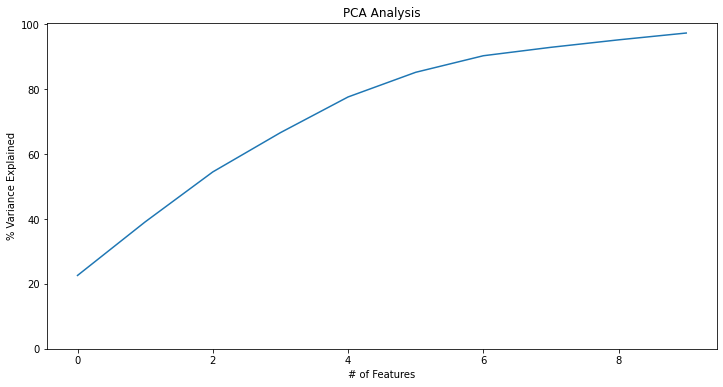

In [18]:
# n_components=10 because we have 10 features in the dataset
pca = PCA(n_components=10)
pca.fit(normalized_df)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

### Using Elbow Method to select optimal number of clusters 

Text(0, 0.5, 'Inertia')

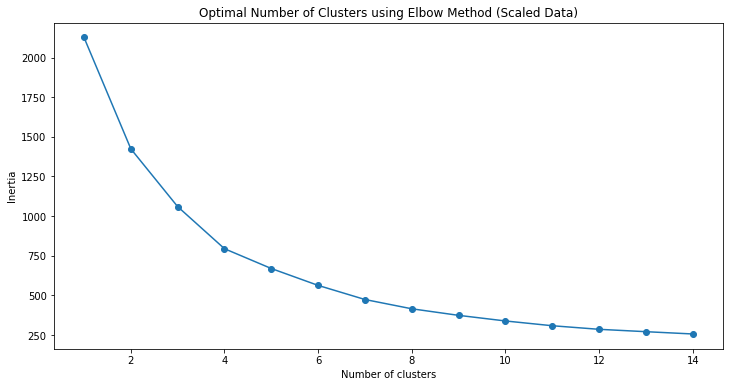

In [19]:
#Using Elbow Method to select optimal number of clusters based on PCA results

sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(X_principal)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.010s...
[t-SNE] Computed neighbors for 4000 samples in 0.329s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.270180
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.294777
[t-SNE] KL divergence after 1000 iterations: 0.697261


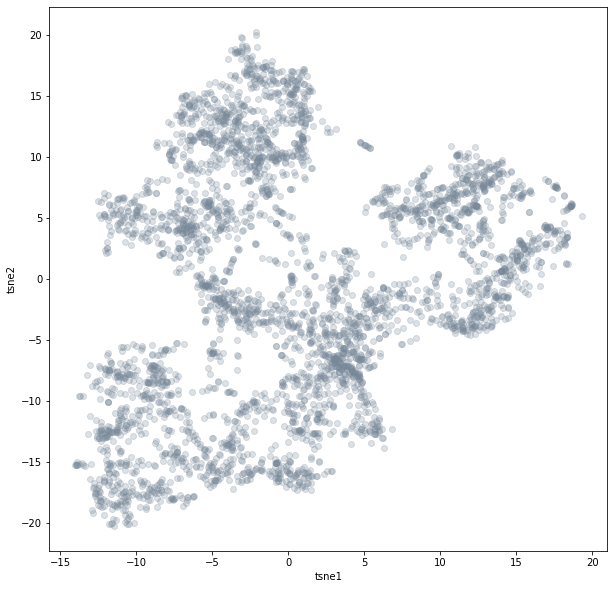

In [20]:
# Using TSNE to reduce dimension and visualise

tsne = TSNE(n_components=3, verbose=1, perplexity=60, n_iter=1000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(normalized_df)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

### Using silhouette method to compare with Elbow method

In [21]:
#Check that silhouette method matches with Elbow method in terms of accuracy

range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(tsne_df_scale)
    centers = clusterer.cluster_centers_

    score = silhouette_score(tsne_df_scale, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]
For n_clusters = 2, silhouette score is 0.35376763343811035)
For n_clusters = 3, silhouette score is 0.41558676958084106)
For n_clusters = 4, silhouette score is 0.4117283821105957)
For n_clusters = 5, silhouette score is 0.42610493302345276)
For n_clusters = 6, silhouette score is 0.40973737835884094)
For n_clusters = 7, silhouette score is 0.41881996393203735)
For n_clusters = 8, silhouette score is 0.406713604927063)
For n_clusters = 9, silhouette score is 0.4166191816329956)


Text(0, 0.5, 'Inertia')

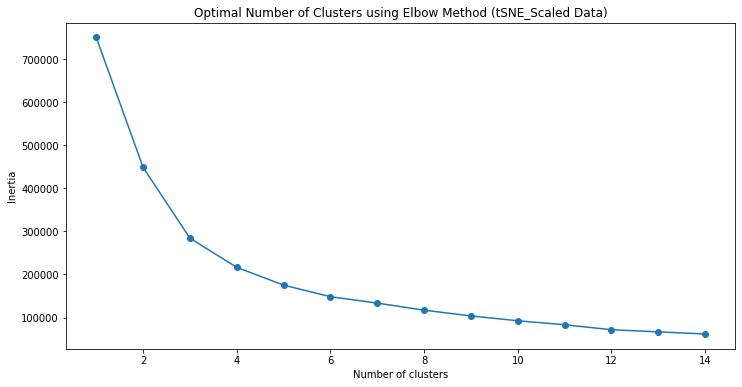

In [22]:
#Use Elbow Method to select optimal number of clusters based on TSNE results

sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [23]:
kmeans_tsne_scale = KMeans(n_clusters=5, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)


KMeans tSNE Scaled Silhouette Score: 0.42610493302345276


In [24]:
clusters_tsne_scale.head()

tsne1      tsne2     tsne3  tsne_clusters
0  -2.645417 -15.752679 -4.558188              2
1  -2.146315 -15.543739 -3.357705              2
2   3.815542   0.265085  1.956261              4
3  14.733286   0.859130 -5.174981              3
4  -0.416052  -2.918014 -1.771140              4

### TSNE + Kmeans Plot

C:\Users\PC\anaconda3\envs\pycaret\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



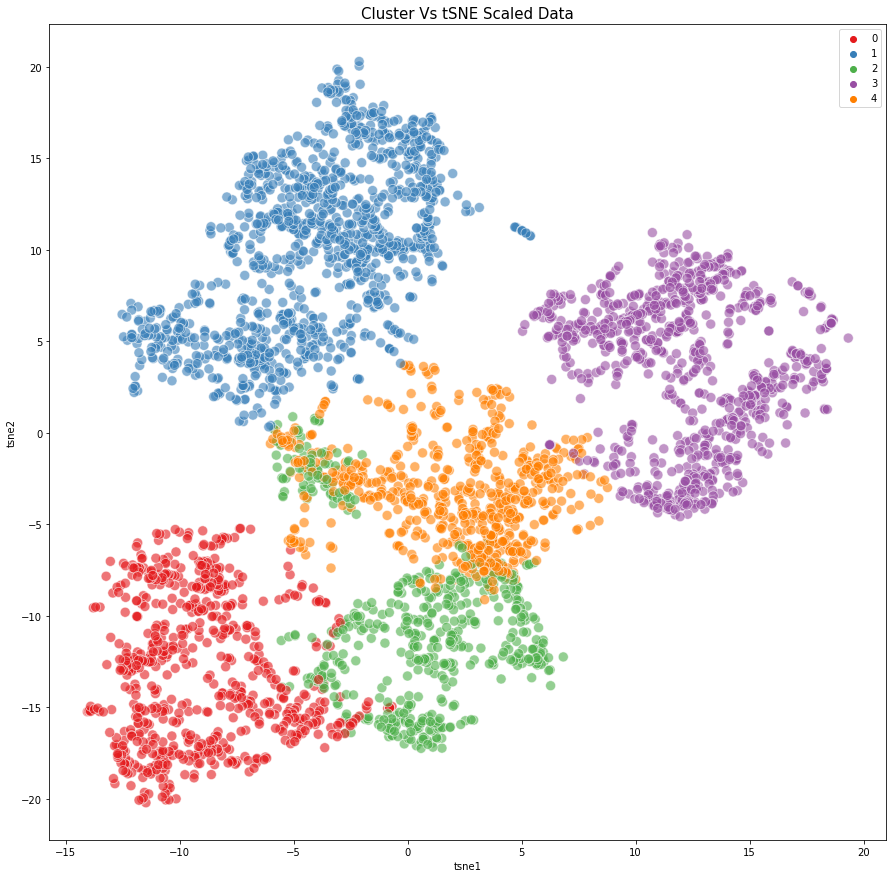

In [25]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vs tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()
#clusters_tsne_scale.to_csv("/Users/oluwatadeadekola/Downloads/Kmeans_Output.csv")


In [26]:
combine_all = pd.concat([df, clusters_tsne_scale], axis=1)
combine_all.to_csv("Kmeans_Output.csv")
combine_all.head()

LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97       1997   
4        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97       1997   

   Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
0    84      4       2.0          0            0              1           0   
1    60      2       2.0          0            0              1           0   
2   180      7       1.0          0            0              1           0   
3    60      2       1.0          0            0              1           0   
4   240     14       1.0          7            7              1           0   

  RevLineCr LowDoc ChgOffDate DisbursementDate  DisbursementGross  \
0         N      Y        NaN        28-Feb-99            60000.0   
1         N      Y        NaN        31-May-97            40000.0   
2         N      N        NaN        31-Dec-97           287000.0   
3         N      Y        NaN        30-Jun-97            35000.0   
4         N      N        NaN        14-May-97           229000.0   

   BalanceGross MIS_Status  ChgOffPrinGr    GrAppv  SBA_Appv      tsne1  \
0           0.0      P I F           0.0   60000.0   48000.0  -2.645417   
1           0.0      P I F           0.0   40000.0   32000.0  -2.146315   
2           0.0      P I F           0.0  287000.0  215250.0   3.815542   
3           0.0      P I F           0.0   35000.0   28000.0  14.733286   
4           0.0      P I F           0.0  229000.0  229000.0  -0.416052   

       tsne2     tsne3  tsne_clusters  
0 -15.752679 -4.558188              2  
1 -15.543739 -3.357705              2  
2   0.265085  1.956261              4  
3   0.859130 -5.174981              3  
4  -2.918014 -1.771140              4

In [27]:
#combine_all.to_csv("/Users/oluwatadeadekola/Downloads/Kmeans_Output.csv")


In [28]:
combine_all[combine_all['tsne_clusters']==1].head()

LoanNr_ChkDgt                         Name         City State    Zip  \
24     1000446006                       SUBWAY  LITTLE ROCK    AR  72223   
30     1000516003  CHICAGO BRICK UNLIMITED INC        MIAMI    FL  33186   
32     1000526006                    RZI, INC.  NEW ORLEANS    LA  70130   
34     1000536009       HUTMACHER HOLDINGS INC      LEANDER    TX  78641   
38     1000576010      CORBIN CREEK GREENHOUSE  SPRINGFIELD    TN  37172   

                              Bank BankState   NAICS ApprovalDate ApprovalFY  \
24                        HOPE FCU        MS  722211     7-Feb-06       2006   
30                  CITIBANK, N.A.        FL  238140     7-Feb-06       2006   
32  BUSINESS RES. CAP. SPECIALTY B        LA  532490     7-Feb-06       2006   
34     WELLS FARGO BANK NATL ASSOC        SD  541611     7-Feb-06       2006   
38                       BBCN BANK        CA  453110     7-Feb-06       2006   

    Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
24   126      7       1.0          0            0              1           1   
30    84      4       1.0          0            4              1           1   
32    60      3       1.0          0            0              1           1   
34    80      2       1.0          4            6              1           2   
38    84      4       1.0          1            4              1           1   

   RevLineCr LowDoc ChgOffDate DisbursementDate  DisbursementGross  \
24         N      N        NaN        30-Apr-06           137300.0   
30         Y      N        NaN        28-Feb-06            51440.0   
32         N      N        NaN        31-May-06            50000.0   
34         Y      N        NaN        31-May-06            63076.0   
38         0      N        NaN        28-Feb-06            20000.0   

    BalanceGross MIS_Status  ChgOffPrinGr    GrAppv  SBA_Appv     tsne1  \
24           0.0      P I F           0.0  137300.0  116705.0 -2.479645   
30           0.0      P I F           0.0   35000.0   17500.0 -2.974526   
32           0.0      P I F           0.0   50000.0   42500.0 -3.474207   
34           0.0      P I F           0.0   25000.0   12500.0 -5.424535   
38           0.0      P I F           0.0   20000.0   17000.0 -3.059065   

       tsne2     tsne3  tsne_clusters  
24  4.357698 -4.221551              1  
30  4.065236 -1.211647              1  
32  4.990815 -3.740178              1  
34  3.298484 -1.909179              1  
38  3.995574 -1.459839              1

In [29]:
combine_all[combine_all['tsne_clusters']==1].describe()

LoanNr_ChkDgt           Zip          NAICS         Term        NoEmp  \
count   1.191000e+03   1191.000000    1191.000000  1191.000000  1191.000000   
mean    1.016583e+09  44531.439966  493657.651553    66.088161     8.885810   
std     6.351324e+06  28562.262746  167253.319607    29.373883    59.809027   
min     1.000446e+09   1013.000000       0.000000     0.000000     1.000000   
25%     1.011930e+09  27591.500000  423830.000000    48.000000     2.000000   
50%     1.016825e+09  33610.000000  511210.000000    83.000000     4.000000   
75%     1.021595e+09  75064.000000  561730.000000    84.000000     7.000000   
max     1.027175e+09  99835.000000  813910.000000   240.000000  2000.000000   

          NewExist    CreateJob  RetainedJob  FranchiseCode   UrbanRural  \
count  1191.000000  1191.000000  1191.000000    1191.000000  1191.000000   
mean      0.999160     0.102435     0.686818      70.933669     1.254408   
std       0.028976     0.538831     2.278541     971.157415     0.439551   
min       0.000000     0.000000     0.000000       1.000000     0.000000   
25%       1.000000     0.000000     0.000000       1.000000     1.000000   
50%       1.000000     0.000000     0.000000       1.000000     1.000000   
75%       1.000000     0.000000     0.000000       1.000000     2.000000   
max       1.000000     8.000000    21.000000   20550.000000     2.000000   

       DisbursementGross  BalanceGross   ChgOffPrinGr         GrAppv  \
count       1.191000e+03        1191.0    1191.000000    1191.000000   
mean        7.277584e+04           0.0    8749.639798   56395.970613   
std         7.582084e+04           0.0   18513.693080   49929.724803   
min         3.000000e+02           0.0       0.000000    3000.000000   
25%         2.575000e+04           0.0       0.000000   25000.000000   
50%         5.000000e+04           0.0       0.000000   50000.000000   
75%         9.535000e+04           0.0    5220.500000   71350.000000   
max         1.035207e+06           0.0  104496.000000  450000.000000   

            SBA_Appv        tsne1        tsne2        tsne3  tsne_clusters  
count    1191.000000  1191.000000  1191.000000  1191.000000         1191.0  
mean    29938.879093    -4.022287    10.015567     1.097020            1.0  
std     29965.753749     3.464845     4.467582     4.599148            0.0  
min      1500.000000   -12.522117     0.318728    -9.411436            1.0  
25%     12500.000000    -6.440750     5.737772    -3.465233            1.0  
50%     25000.000000    -3.795721    10.447162     2.357931            1.0  
75%     37500.000000    -1.462183    13.440201     4.603337            1.0  
max    360000.000000     5.387437    20.286648    10.527503            1.0

array([[<AxesSubplot:title={'center':'LoanNr_ChkDgt'}>,
        <AxesSubplot:title={'center':'Zip'}>,
        <AxesSubplot:title={'center':'NAICS'}>,
        <AxesSubplot:title={'center':'Term'}>],
       [<AxesSubplot:title={'center':'NoEmp'}>,
        <AxesSubplot:title={'center':'NewExist'}>,
        <AxesSubplot:title={'center':'CreateJob'}>,
        <AxesSubplot:title={'center':'RetainedJob'}>],
       [<AxesSubplot:title={'center':'FranchiseCode'}>,
        <AxesSubplot:title={'center':'UrbanRural'}>,
        <AxesSubplot:title={'center':'DisbursementGross'}>,
        <AxesSubplot:title={'center':'BalanceGross'}>],
       [<AxesSubplot:title={'center':'ChgOffPrinGr'}>,
        <AxesSubplot:title={'center':'GrAppv'}>,
        <AxesSubplot:title={'center':'SBA_Appv'}>,
        <AxesSubplot:title={'center':'tsne1'}>],
       [<AxesSubplot:title={'center':'tsne2'}>,
        <AxesSubplot:title={'center':'tsne3'}>,
        <AxesSubplot:title={'center':'tsne_clusters'}>, <AxesSubplot:>]

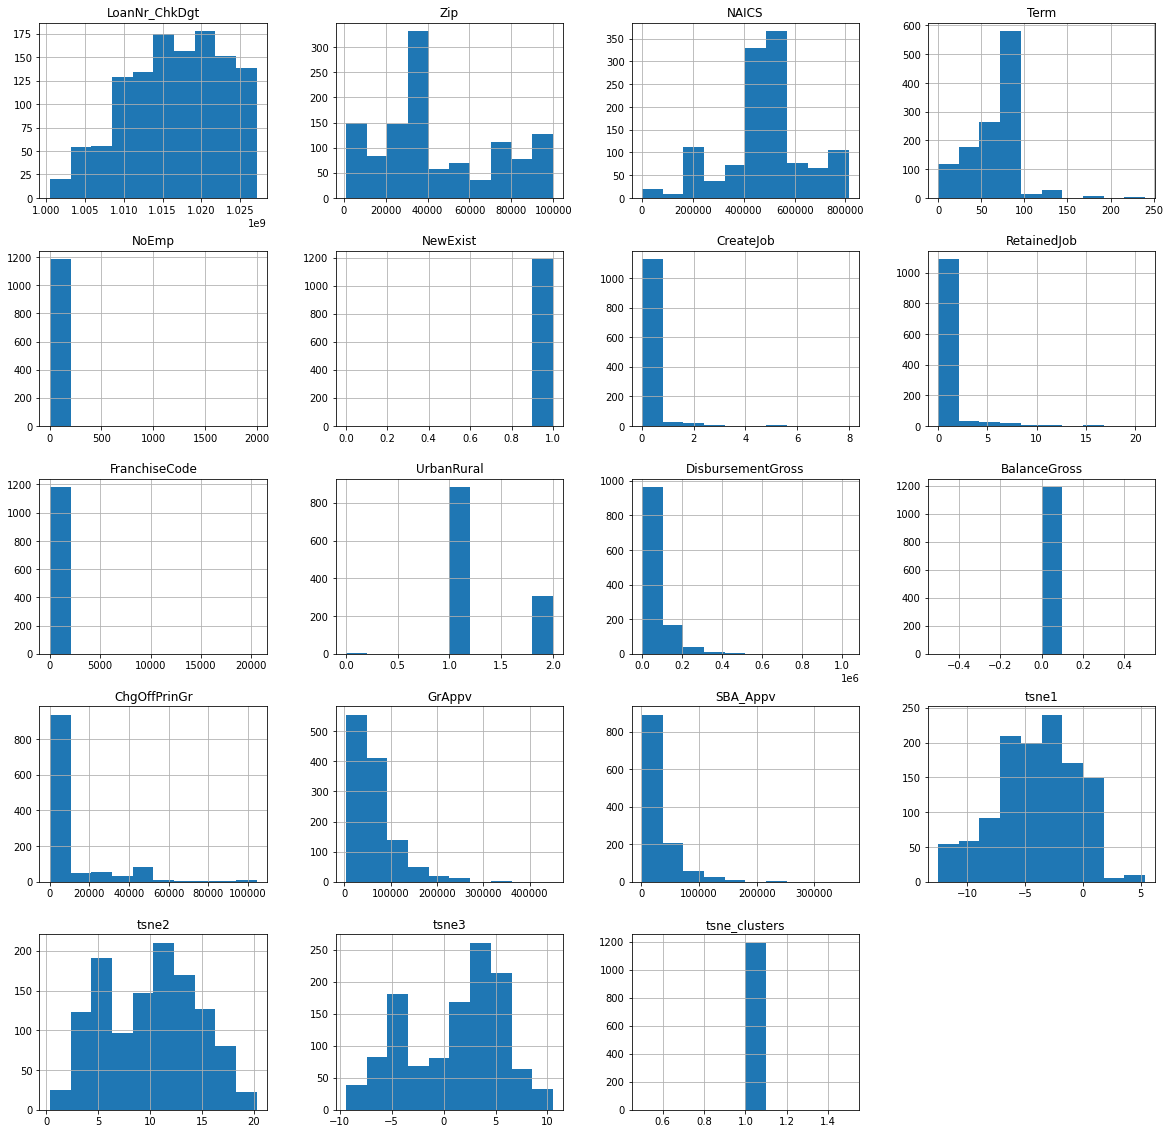

In [30]:
combine_all[combine_all['tsne_clusters']==1].hist(figsize=(20,20))

In [31]:
combine_all[combine_all['tsne_clusters']==2].head()

LoanNr_ChkDgt                           Name            City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT      EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)       NEW PARIS    IN  46526   
6     1000093009  MIDDLE ATLANTIC SPORTS CO INC           UNION    NJ   7083   
7     1000094005                WEAVER PRODUCTS     SUMMERFIELD    FL  34491   
8     1000104006               TURTLE BEACH INN  PORT SAINT JOE    FL  32456   

                          Bank BankState   NAICS ApprovalDate ApprovalFY  \
0             FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1              1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
6  WELLS FARGO BANK NATL ASSOC        SD       0     2-Jun-80       1980   
7                 REGIONS BANK        AL  811118    28-Feb-97       1997   
8              CENTENNIAL BANK        FL  721310    28-Feb-97       1997   

   Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
0    84      4       2.0          0            0              1           0   
1    60      2       2.0          0            0              1           0   
6    45     45       2.0          0            0              0           0   
7    84      1       2.0          0            0              1           0   
8   297      2       2.0          0            0              1           0   

  RevLineCr LowDoc ChgOffDate DisbursementDate  DisbursementGross  \
0         N      Y        NaN        28-Feb-99            60000.0   
1         N      Y        NaN        31-May-97            40000.0   
6         N      N  24-Jun-91        22-Jul-80           600000.0   
7         N      Y        NaN        30-Jun-98            45000.0   
8         N      N        NaN        31-Jul-97           305000.0   

   BalanceGross MIS_Status  ChgOffPrinGr    GrAppv  SBA_Appv     tsne1  \
0           0.0      P I F           0.0   60000.0   48000.0 -2.645417   
1           0.0      P I F           0.0   40000.0   32000.0 -2.146315   
6           0.0     CHGOFF      208959.0  600000.0  499998.0 -3.369881   
7           0.0      P I F           0.0   45000.0   36000.0 -1.865587   
8           0.0      P I F           0.0  305000.0  228750.0  2.667740   

       tsne2     tsne3  tsne_clusters  
0 -15.752679 -4.558188              2  
1 -15.543739 -3.357705              2  
6  -3.260718 -9.569851              2  
7 -15.661370 -2.798351              2  
8 -10.252909 -0.449688              2

In [32]:
combine_all[combine_all['tsne_clusters']==2].describe()

LoanNr_ChkDgt           Zip          NAICS        Term       NoEmp  \
count   5.470000e+02    547.000000     547.000000  547.000000  547.000000   
mean    1.011551e+09  43258.886654  270036.829982   94.588665    6.720293   
std     7.550857e+06  31482.714830  286040.646410   57.964313   15.568483   
min     1.000014e+09   1002.000000       0.000000    1.000000    0.000000   
25%     1.005826e+09  12915.500000       0.000000   60.000000    2.000000   
50%     1.009514e+09  40291.000000  235210.000000   84.000000    3.000000   
75%     1.017564e+09  72023.500000  523219.000000  120.000000    7.000000   
max     1.027154e+09  99223.000000  812320.000000  301.000000  300.000000   

         NewExist   CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
count  547.000000  547.000000   547.000000     547.000000  547.000000   
mean     1.914077    0.056673     0.341865     634.650823    0.084095   
std      0.280507    0.493999     2.053796    3309.902690    0.296906   
min      1.000000    0.000000     0.000000       0.000000    0.000000   
25%      2.000000    0.000000     0.000000       1.000000    0.000000   
50%      2.000000    0.000000     0.000000       1.000000    0.000000   
75%      2.000000    0.000000     0.000000       1.000000    0.000000   
max      2.000000    6.000000    25.000000   35300.000000    2.000000   

       DisbursementGross  BalanceGross  ChgOffPrinGr        GrAppv  \
count       5.470000e+02         547.0  5.470000e+02  5.470000e+02   
mean        1.319223e+05           0.0  4.388698e+04  1.328371e+05   
std         1.667549e+05           0.0  1.318536e+05  1.689151e+05   
min         0.000000e+00           0.0  0.000000e+00  5.000000e+03   
25%         4.650000e+04           0.0  0.000000e+00  4.925000e+04   
50%         8.500000e+04           0.0  0.000000e+00  8.500000e+04   
75%         1.650000e+05           0.0  0.000000e+00  1.500000e+05   
max         2.000000e+06           0.0  1.311939e+06  2.000000e+06   

           SBA_Appv       tsne1       tsne2       tsne3  tsne_clusters  
count  5.470000e+02  547.000000  547.000000  547.000000          547.0  
mean   9.704205e+04    0.374291  -10.162206   -6.230883            2.0  
std    1.160357e+05    3.232721    4.483911    2.964615            0.0  
min    2.500000e+03   -5.865916  -17.248911  -12.246490            2.0  
25%    3.200000e+04   -2.578664  -13.091813   -8.414167            2.0  
50%    6.000000e+04    0.594442  -10.847993   -6.871721            2.0  
75%    1.132500e+05    2.723014   -8.023877   -3.592096            2.0  
max    1.012500e+06    6.825994    0.872604   -0.239725            2.0

In [34]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [35]:
df.shape

(4000, 27)

### Building An Anomaly Detection Model for the Loan dataset

In [46]:
#General stats of df_A training features
df_tr_features = df[['LoanNr_ChkDgt', 'BalanceGross', 
                    'DisbursementGross', 'GrAppv', 
                     'SBA_Appv']]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_tr_features.describe()

LoanNr_ChkDgt  BalanceGross  DisbursementGross      GrAppv    SBA_Appv
count       4000.000      4000.000           4000.000    4000.000    4000.000
mean  1013464058.281         0.000         136322.098  128445.825   90918.746
std      7590365.823         0.000         223941.092  216759.707  169559.291
min   1000014003.000         0.000              0.000    3000.000    1500.000
25%   1006922753.000         0.000          30000.000   25000.000   14250.000
50%   1013534005.000         0.000          63124.000   50000.000   31650.000
75%   1019697255.250         0.000         140000.000  121025.000   80000.000
max   1027175001.000         0.000        3599911.000 2500000.000 2000000.000

In [58]:
df_tr_features_train = df_tr_features.iloc[:3000,:]
df_tr_features_test = df_tr_features.iloc[3001:,:]
print('Data for Modeling: ' + str(df_tr_features_train.shape))
print('Unseen Data For Predictions: ' + str(df_tr_features_test.shape))

Data for Modeling: (3000, 5)
Unseen Data For Predictions: (999, 5)


In [59]:
from pycaret.utils import version
from pycaret.anomaly import *
exp_ano = setup(df_tr_features, normalize = True)

In [60]:
## creating a model
iforest=create_model('iforest', contamination=0.05)
print (iforest)

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=1941, verbose=0)


In [61]:
## plotting a model
plot_model(iforest)

In [62]:
iforest_predictions = predict_model(iforest, data = df_tr_features)


In [63]:
iforest_predictions

LoanNr_ChkDgt  BalanceGross  DisbursementGross     GrAppv   SBA_Appv  \
0        1000014003         0.000          60000.000  60000.000  48000.000   
1        1000024006         0.000          40000.000  40000.000  32000.000   
2        1000034009         0.000         287000.000 287000.000 215250.000   
3        1000044001         0.000          35000.000  35000.000  28000.000   
4        1000054004         0.000         229000.000 229000.000 229000.000   
...             ...           ...                ...        ...        ...   
3995     1027134004         0.000         600000.000 600000.000 450000.000   
3996     1027154010         0.000         369000.000 369000.000 276750.000   
3997     1027155006         0.000          59809.000  30000.000  15000.000   
3998     1027165009         0.000          57000.000  50000.000  25000.000   
3999     1027175001         0.000         116000.000 116000.000  58000.000   

      Anomaly  Anomaly_Score  
0           0         -0.114  
1           0         -0.108  
2           0         -0.013  
3           0         -0.108  
4           0         -0.016  
...       ...            ...  
3995        1          0.048  
3996        1          0.007  
3997        0         -0.122  
3998        0         -0.139  
3999        0         -0.090  

[4000 rows x 7 columns]

In [64]:
(iforest_predictions['Anomaly'] == 1).sum()

200

In [65]:
iforest_predictions[iforest_predictions['Anomaly'] == 1].head(10)

LoanNr_ChkDgt  BalanceGross  DisbursementGross      GrAppv    SBA_Appv  \
5      1000084002         0.000         517000.000  517000.000  387750.000   
6      1000093009         0.000         600000.000  600000.000  499998.000   
13     1000154010         0.000         370000.000  370000.000  277500.000   
20     1000324002         0.000         615000.000  615000.000  461250.000   
23     1000434000         0.000        1250000.000 1250000.000  937500.000   
31     1000524003         0.000         600000.000  600000.000  450000.000   
58     1000726007         0.000        1350000.000 1350000.000 1012500.000   
63     1000754002         0.000         745000.000  745000.000  558750.000   
71     1000786003         0.000        1524200.000 1535000.000 1151250.000   
77     1000816010         0.000         577000.000  300000.000  150000.000   

    Anomaly  Anomaly_Score  
5         1          0.036  
6         1          0.057  
13        1          0.003  
20        1          0.053  
23        1          0.171  
31        1          0.042  
58        1          0.183  
63        1          0.083  
71        1          0.196  
77        1          0.029

In [66]:
plot_model(iforest, plot = 'umap')

### Model deployment

In [67]:
unseen_predictions = predict_model(iforest, data=df_tr_features_test)
unseen_predictions.head(10)

LoanNr_ChkDgt  BalanceGross  DisbursementGross     GrAppv   SBA_Appv  \
3001     1019705005         0.000          75000.000  75000.000  37500.000   
3002     1019706001         0.000          27376.000  27700.000  13850.000   
3003     1019714001         0.000          50000.000  50000.000  40000.000   
3004     1019716004         0.000         557000.000 557000.000 557000.000   
3005     1019725000         0.000           3393.000  40000.000  20000.000   
3006     1019734007         0.000         100000.000 100000.000  80000.000   
3007     1019735003         0.000         160409.000 100000.000  50000.000   
3008     1019745006         0.000          40000.000  40000.000  20000.000   
3009     1019746002         0.000         100000.000 100000.000  50000.000   
3010     1019755009         0.000          64575.000  50000.000  25000.000   

      Anomaly  Anomaly_Score  
3001        0         -0.183  
3002        0         -0.191  
3003        0         -0.195  
3004        1          0.023  
3005        0         -0.162  
3006        0         -0.169  
3007        0         -0.159  
3008        0         -0.193  
3009        0         -0.181  
3010        0         -0.203